In [1]:
from importlib import reload
import sys
import os
sys.path.append(os.path.abspath('../'))
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import backtester

In [2]:
r4 = backtester.utils.load_all_price_data(4)

Data for Round 4, Day -2 not found. Skipping.
Data for Round 4, Day -1 not found. Skipping.
Data for Round 4, Day 0 not found. Skipping.
Found data file at ../../Prosperity 3 Data/Round 4/prices_round_4_day_1.csv
Found data file at ../../Prosperity 3 Data/Round 4/prices_round_4_day_2.csv
Found data file at ../../Prosperity 3 Data/Round 4/prices_round_4_day_3.csv
Data for Round 4, Day 4 not found. Skipping.


In [9]:
reload(backtester.utils)
obs = backtester.utils.load_all_oberservations(4)

Found data file at ../../Prosperity 3 Data/Round 4/observations_round_4_day_1.csv
Found data file at ../../Prosperity 3 Data/Round 4/observations_round_4_day_2.csv
Found data file at ../../Prosperity 3 Data/Round 4/observations_round_4_day_3.csv


In [ ]:
macroons = r4[r4['product']== 'MAGNIFICENT_MACARONS'].merge(obs, on='timestamp').set_index('timestamp')
macroons['vwap'] = backtester.utils.get_vwap(r4, 'MAGNIFICENT_MACARONS')

In [23]:
macroons.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,...,mid_price,profit_and_loss,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,vwap
timestamp,,,,,,,,,,,,,,,,,,,,,
0,1,MAGNIFICENT_MACARONS,624.0,20.0,622.0,12.0,617.0,23.0,631,10,...,627.5,0.0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,628.700000
100,1,MAGNIFICENT_MACARONS,627.0,14.0,625.0,12.0,620.0,21.0,634,7,...,630.5,0.0,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,631.977011
200,1,MAGNIFICENT_MACARONS,627.0,10.0,625.0,15.0,620.0,21.0,634,5,...,630.5,0.0,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,632.436782
300,1,MAGNIFICENT_MACARONS,629.0,14.0,627.0,14.0,622.0,26.0,636,7,...,632.5,0.0,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,634.039604
400,1,MAGNIFICENT_MACARONS,628.0,18.0,625.0,16.0,620.0,26.0,635,9,...,631.5,0.0,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,632.657658


<Axes: xlabel='timestamp'>

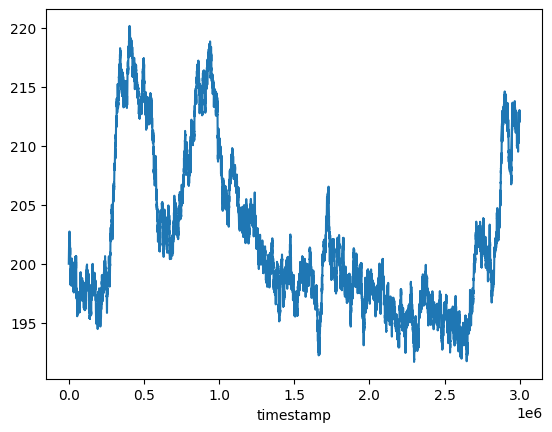

In [24]:
macroons['sugarPrice'].plot()

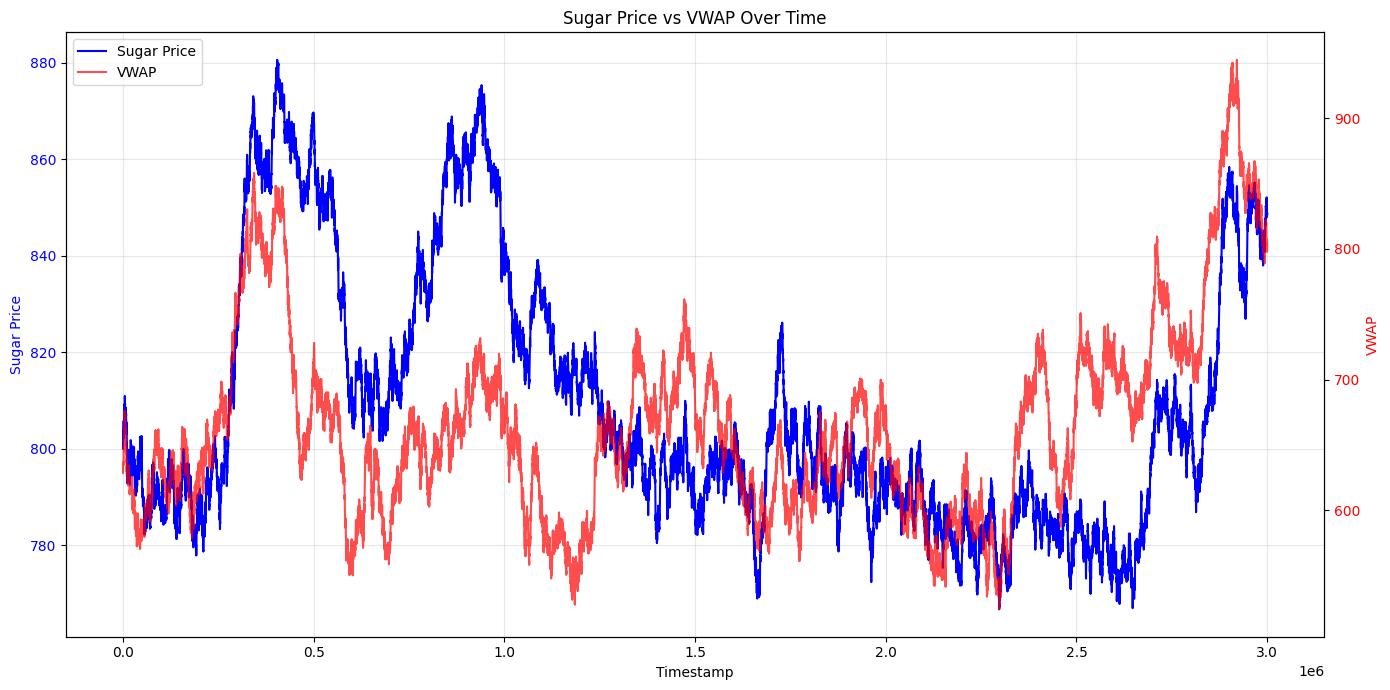

In [27]:
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot sugar prices on primary y-axis
ax1.plot(macroons['sugarPrice']*4, color='blue', label='Sugar Price')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Sugar Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for VWAP
ax2 = ax1.twinx()
ax2.plot(macroons['vwap'], color='red', alpha=0.7, label='VWAP')
ax2.set_ylabel('VWAP', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Sugar Price vs VWAP Over Time')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Add grid
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()